# 시계열 데이터란?
* 시퀀스(sequence)데이터로도 불림
* 시간 또는 연속된 순서가 중요한 데이터
   * ex. 신용카드 매출 예측 (데이콘)
   * ex. 주가데이터는 시간 순서가 있어서 시계열 데이터
   * ex. 영어는 어순에 따라 의미가 달라지기 때문에, 시계열 데이터
* 시간 축을 포함하여 3D 텐서로 저장됨: (samples, timesteps, features)
   * 참고로, 이미지 텐서는 (samples, height, width, color_depth)로 나타냈음
* 시퀀스 데이터를 처리하는 기본적인 딥러닝 모델은 보통 순환신경망(Recurrent Neural Network; RNN)과 1D 컨브넷 두가지이다. 

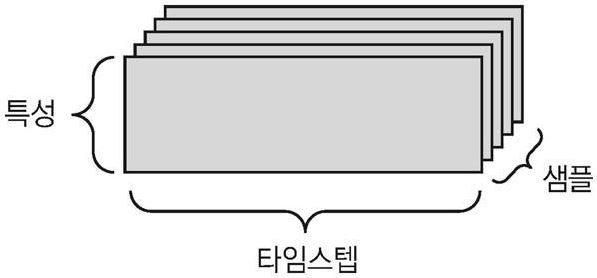

In [ ]:
from IPython.display import Image
Image('/TimeSeriesTensor.JPG')

# 출처: https://images.app.goo.gl/EZCBjgDTVSrFRGi48

* ex) 주식 데이터셋
  - 1분마다 현재 주식 가격, 지난 1분동안 최고/최소 가격을 저장 → 총 3가지
  - 하루의 거래 시간은 390분이기 때문에, 하루 동안의 거래는 (390, 3) 크기의 2D 텐서로 인코딩됨
  - 250일치의 데이터는 (250, 390, 3) 크기의 3D 텐서로 저장될 수 있음
  - (250, 390, 3) → (samples, timesteps, features)

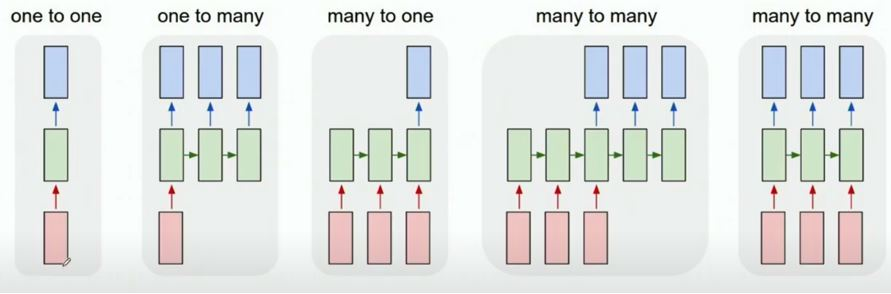

In [ ]:
# Types of Task Dealing with Sequential Data
from IPython.display import Image
Image('/TimeSeriesDeepLearning.png')

# One to one: CNN 등 
# ex. 이미지를 주고, cat/dog 분류
# ex. MNIST 데이터로 0~9 분류

# 1. One to many: 
# ex. Automatically generate caption with the given image(이미지를 주고, image를 설명하는 말을 만들어보기)
#     - caption이 시계열 데이터
#     - 동작원리: 이미지를 주고, CNN 모델을 달면, feature 벡터들이 나온 걸 input으로 줌
#                 output은 이미지 feature 벡터들을 설명하는 자연어 문장을 생성
#                 (대신, 라벨링된 pair가 많아야함 ex. 어떤 이미지는 고양이가 밥먹는 사진 등)

# 2. Many to one:
# ex. Predict whether a company would be bankrupted(어떤 회사의 재무상황표를 주고, 이 회사가 1년안에 망할지 안 망할지 예측)
#     - 시간에 따른 회사의 재정 상태가 시계열
#     - 동작원리: 특정 회사 주식의 주가를 모델한테 보여주고, sequence에 대한 feature 벡터 생성
#                 feature 벡터에 대해 classifier가 망할지 안 망할지 결정(binary classification)

# 3. Many to Many(1):
# ex. Translate one sentence into another language(문장을 하나 주고, 다른 언어로 번역)
#     - 문장 = sequence of words 이라 시계열
#     - 동작원리: 문장의 단어들을 주면, 그 문장에 대한 feature 벡터가 나옴
#                 feature 벡터를 가지고 다른 word space에서 단어들을 생성

# 4. Many to Many(2):
# ex. 문장을 주면, 각 토큰의 품사(주어, 동사, 전치사 등)를 분류(multi-label classification)
#     - 문장 = sequence of words 이라 시계열

# 새로운 문제가 주어지면, 4가지 중 어떤건지 부터 파악해야함 → IBM 주가 예측 (many to one)

# RNN(Recurrent Neural Network)

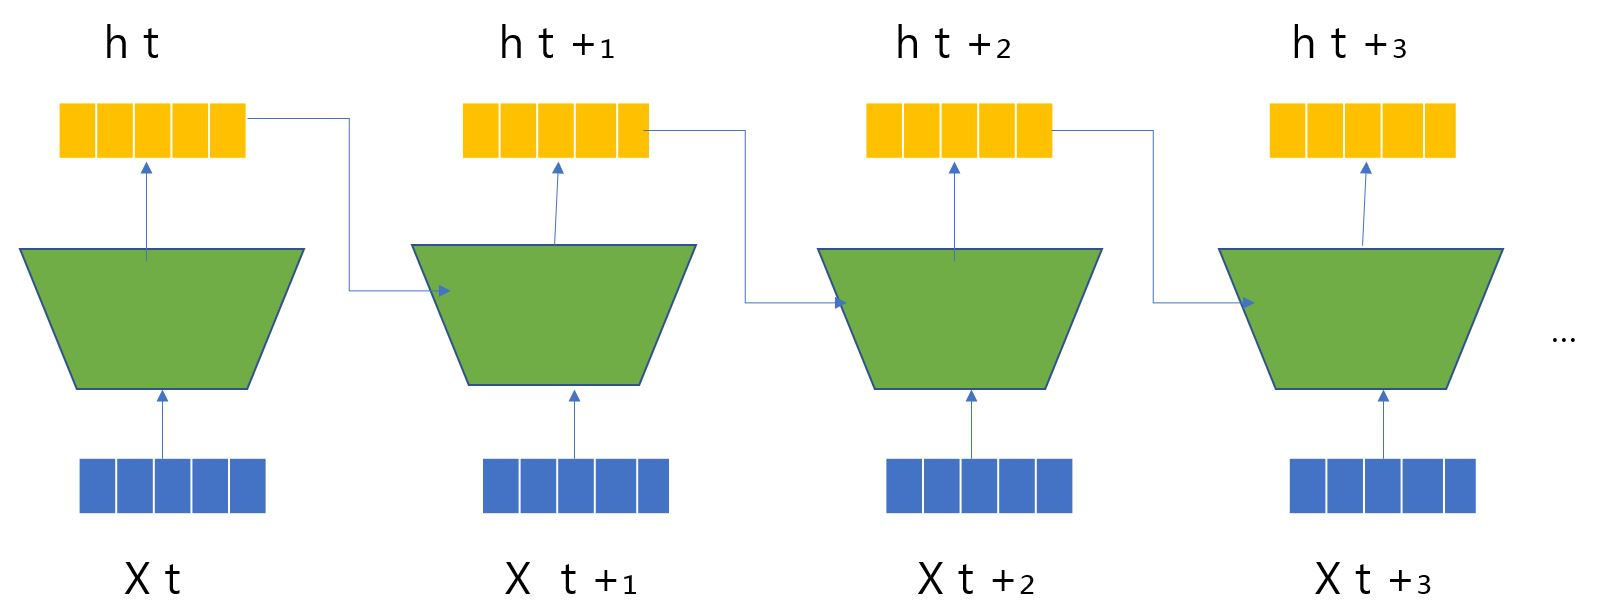

In [ ]:
from IPython.display import Image
Image('/RNN.JPG')


# RNN: Process both new inputs and model output of previous input! 
#      전후 관계(order)를 고려하고 위해, 이전 step의 output과 새로운 input을 넣어 현재 step의 output을 만들기

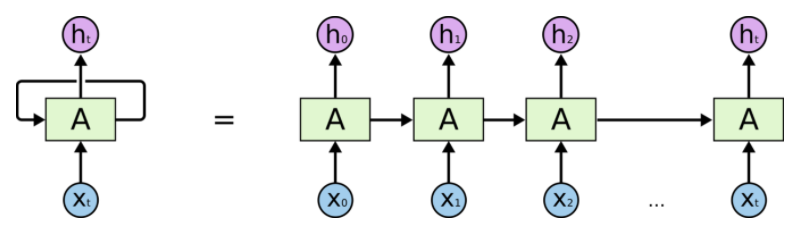

In [ ]:
from IPython.display import Image
Image('/RNN2.PNG')

# 출처: https://images.app.goo.gl/XHAfTYhb9hY5Fqnh6

# LSTM으로 IBM 주가 예측하기
* LSTM:  기존의 RNN(Recurrent Neural Network) 모델이 학습이 길어지면 초기에 학습한 결과를 잊어버리는 <b>기울기 소실(Vanishing Gradient)</b> 문제를 극복하기 위해 입력 게이트, 출력 게이트, 망각 게이트로 구성된 셀(Cell)을 추가하여 개선한 모델 
→ 과거 학습정보를 기억하고 새로운 학습결과에 반영이 가능함 
→ 시계열 문제 및 예측 문제에 성능을 발휘하는 학습 모델임

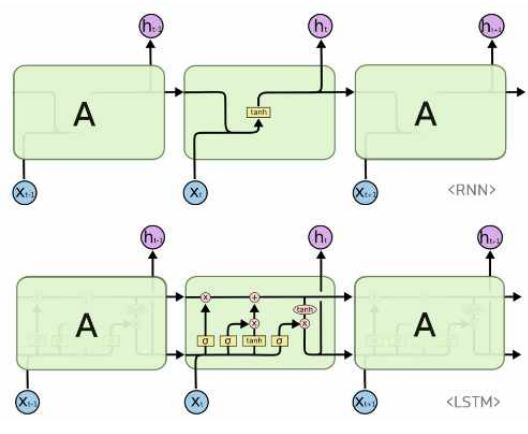

In [ ]:
from IPython.display import Image
Image('/RNNvsLSTM.JPG')

# RNN과 LSTM 비교

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [ ]:
# First, we get the data

# Pandas의 DataReader함수:구글이 제공하는 주가 정보 받아올 수 있음
from pandas_datareader import data
import fix_yahoo_finance as yf
from datetime import datetime # 최근 날짜 받기 위해

yf.pdr_override()

start_date = '2006-1-1'
end_date =  end=datetime.now()
dataset = data.get_data_yahoo('IBM', start_date, end_date) # IBM 주가, 2006-01-01~ 현재 날짜(2021년 5월 27일)

dataset.head()

# 결과: 날짜, 시작가, 상한가, 하한가, 종가, 수정 종가, 거래량

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,82.449997,82.550003,80.809998,82.059998,53.155849,11715100
2006-01-04,82.199997,82.500000,81.330002,81.949997,53.084583,9832800
2006-01-05,81.400002,82.900002,81.250000,82.500000,53.440865,7213400
2006-01-06,83.949997,85.029999,83.410004,84.949997,55.027885,8196900
2006-01-09,83.900002,84.250000,83.379997,83.730003,54.237621,6851100


In [ ]:
# Create a new dataframe with only the 'Adj Close' column
# Adj Close 항목은 수정 종가라는 뜻으로 분할, 배당, 배분 신주 발생이 된 경우를 고려해 주식 가격을 조정(adjustment) 해둔 가격
# 보통 데이터 분석에는 이전 데이터와의 관계를 분석하는 것이 중요하기 때문에 데이터의 연속성을 위해 수정 종가를 사용 
data = dataset.filter(['Adj Close'])

# Convert the dataframe to a numpy array
dataset_numpy = data.values

In [ ]:
# Get the number of rows to train the model (Train 95%, Test 5%)
training_data_len = int(np.ceil( len(dataset_numpy) * .95 ))

training_data_len

3685

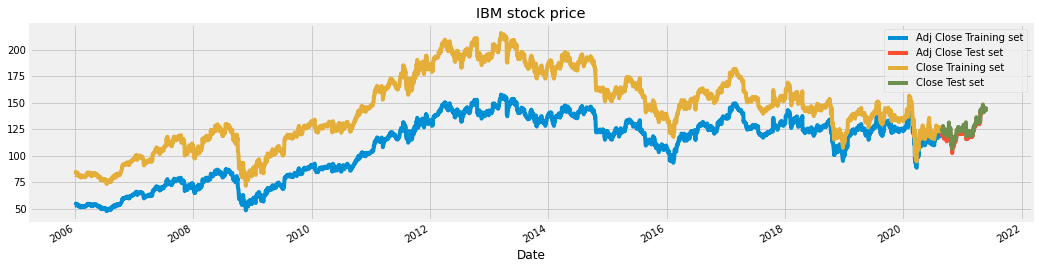

In [ ]:
# 'Adj Close'와 'Close'의 차이를 보여주기 위한 그래프
dataset["Adj Close"][:training_data_len].plot(figsize=(16,4),legend=True)
dataset["Adj Close"][training_data_len:].plot(figsize=(16,4),legend=True)
dataset["Close"][:training_data_len].plot(figsize=(16,4),legend=True)
dataset["Close"][training_data_len:].plot(figsize=(16,4),legend=True)
plt.legend(['Adj Close Training set','Adj Close Test set', 'Close Training set','Close Test set'])
plt.title('IBM stock price')
plt.show()

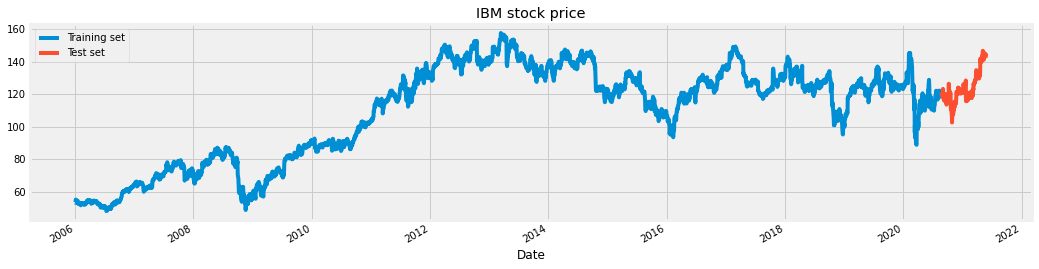

In [ ]:
# We have chosen 'Adj Close' attribute for prices. Let's see what it looks like
dataset["Adj Close"][:training_data_len].plot(figsize=(16,4),legend=True)
dataset["Adj Close"][training_data_len:].plot(figsize=(16,4),legend=True)
plt.legend(['Training set','Test set'])
plt.title('IBM stock price')
plt.show()

In [ ]:
# Scale the data (데이터 전처리)
# Scaling 하는 이유: 회사들의 주가 범위가 크게 다르므로, 데이터의 스케일을 맞춰 가중치의 스케일도 일관성 있게 맞추기 위해

# MinMax 스케일링 방법: 데이터의 최댓값을 1, 최솟값을 0으로 둠
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset_numpy)

scaled_data

array([[0.04741273],
       [0.04676383],
       [0.05000787],
       ...,
       [0.86892711],
       [0.87293344],
       [0.872205  ]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

# timesteps 60분으로 하기 위해, 다시 scaling
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.04741273, 0.04676383, 0.05000787, 0.0644581 , 0.05726254,
       0.05926787, 0.05985761, 0.05631869, 0.05395956, 0.05295694,
       0.05767539, 0.05348775, 0.04328399, 0.04357909, 0.04027598,
       0.04062991, 0.03950916, 0.0412786 , 0.04487647, 0.04293013,
       0.04670503, 0.04251731, 0.03508567, 0.03237254, 0.03437796,
       0.04117777, 0.03881261, 0.04431152, 0.03904911, 0.04289244,
       0.04147338, 0.04182812, 0.04064554, 0.03940384, 0.04442983,
       0.03763005, 0.03703865, 0.04017268, 0.03786656, 0.03585613,
       0.03609278, 0.0362108 , 0.03644747, 0.03816221, 0.04318831,
       0.04247869, 0.04573071, 0.04785948, 0.05347656, 0.0564331 ,
       0.05341745, 0.0559601 , 0.05761575, 0.05897575, 0.06275997,
       0.05536872, 0.05631473, 0.05465918, 0.05081574, 0.0549548 ])]
[0.05536872068277071]

[array([0.04741273, 0.04676383, 0.05000787, 0.0644581 , 0.05726254,
       0.05926787, 0.05985761, 0.05631869, 0.05395956, 0.05295694,
       0.05767539, 0.05348775, 0.04

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
# 더 복잡한 모델도 있었지만, loss 그래프가 성능상 병목이 있어서 아래 모델로 선정
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

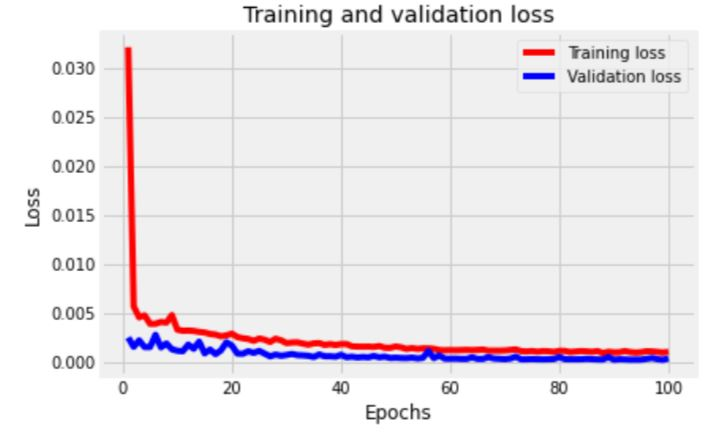

In [ ]:
from IPython.display import Image
Image('/bottleneck.JPG')

# 참고: 과대적합은 없지만 성능상 병목이 있는 그래프
# 병목(bottleneck)? 전체 시스템의 성능이나 용량이 하나의 구성 요소로 인해 제한을 받는 현상
# 병목 현상 개선 방법: 네트워크의 용량을 늘려야함(층에 있는 유닛 수를 늘리거나, 층을 더 많이 추가해주기)

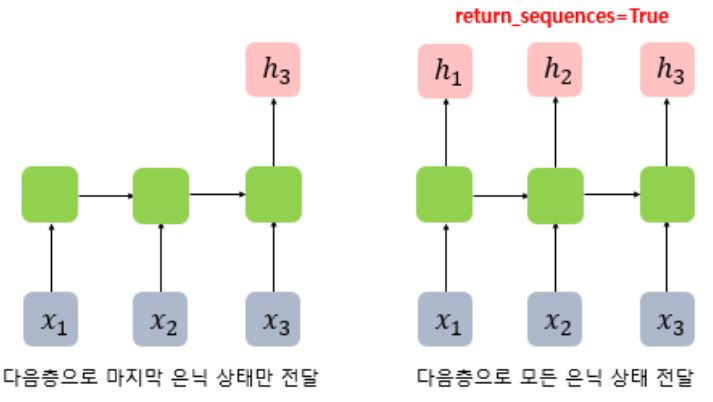

In [ ]:
# return_sequences = True 설명

from IPython.display import Image
Image('/return_sequences.JPG')

# RNN 층은 3D 텐서를 입력받아, 어떻게 은닉 상태를 출력할까?
# 1. False인 경우, 메모리 셀의 최종 시점의 은닉 상태만 리턴: (batch_size, output_dim)
# 2. True인 경우, 메모리 셀의 각 시점(time step)의 은닉 상태 값들을 모아서 전체 시퀀스를 리턴: (batch_size, time_steps, output_dim)

In [ ]:
model.summary()

# 60은 timesteps고, output_dim은 128 → 64 → 25 → 1 (하나의 예측 값 나옴)
# 참고로, output_dim은 앞 코드에서 정의한 hidden_size의 값으로 설정됨

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 128)           66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 25)                1625      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


# Epoch 30인 경우

In [ ]:
# Train the model
history = model.fit(x_train, y_train, batch_size=20, epochs=30, validation_split = 0.1)

Epoch 1/30
164/164 [==============================] - 24s 14ms/step - loss: 0.0131 - val_loss: 0.0026
Epoch 2/30
164/164 [==============================] - 1s 8ms/step - loss: 7.0079e-04 - val_loss: 0.0019
Epoch 3/30
164/164 [==============================] - 1s 8ms/step - loss: 7.3568e-04 - val_loss: 0.0017
Epoch 4/30
164/164 [==============================] - 1s 8ms/step - loss: 5.8014e-04 - val_loss: 0.0027
Epoch 5/30
164/164 [==============================] - 1s 8ms/step - loss: 7.3289e-04 - val_loss: 0.0017
Epoch 6/30
164/164 [==============================] - 1s 8ms/step - loss: 6.6417e-04 - val_loss: 0.0011
Epoch 7/30
164/164 [==============================] - 1s 8ms/step - loss: 4.5621e-04 - val_loss: 0.0023
Epoch 8/30
164/164 [==============================] - 1s 8ms/step - loss: 4.6635e-04 - val_loss: 8.8257e-04
Epoch 9/30
164/164 [==============================] - 1s 7ms/step - loss: 4.2910e-04 - val_loss: 8.4968e-04
Epoch 10/30
164/164 [==============================] - 1s 

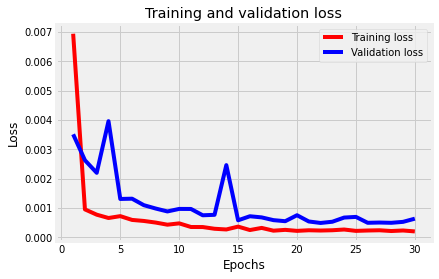

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history): 

    history_dict = history.history
    history_dict.keys()

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, loss, 'r', label='Training loss')
    # b is for "solid blue line"
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
plot_history(history)

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset_numpy[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

# Root Mean Square Error(RMSE). 
# The error or the difference between the target and the obtained output value is minimized by using RMSE value.

2.128722786116225

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


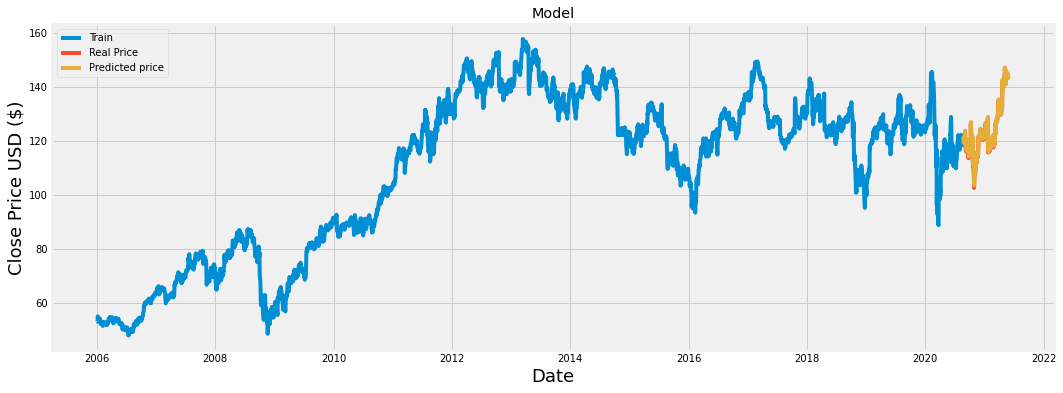

In [ ]:
# Plot the data
train = data[:training_data_len]
test = data[training_data_len:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(test[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Real Price', 'Predicted price'], loc='best')
plt.show()

# training 데이터부터 모두 보여주기

In [ ]:
# 실제 값으로 보여주기
test[['Adj Close', 'Predictions']]

,Adj Close,Predictions
Date,,
2020-08-24,120.899185,118.998810
2020-08-25,119.898750,121.420944
2020-08-26,119.446617,120.467560
2020-08-27,119.908363,119.888458
2020-08-28,120.312386,120.349007
...,...,...
2021-05-24,144.720001,144.976181
2021-05-25,143.789993,144.817368
2021-05-26,143.380005,143.754044


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


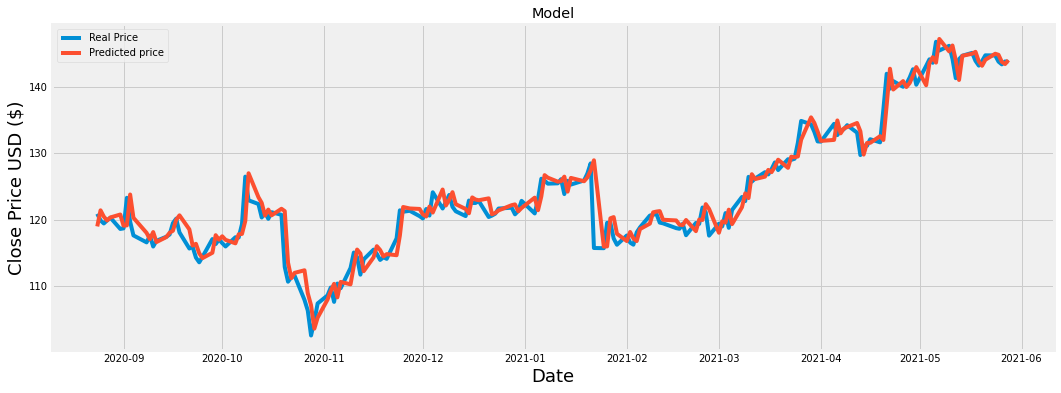

In [ ]:
# Plot the data
train = data[:training_data_len]
test = data[training_data_len:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(test[['Adj Close', 'Predictions']])
plt.legend(['Real Price', 'Predicted price'], loc='best')
plt.show()

# test부분만 보여줌. 얼마나 잘 예측했는지

# Epoch 50인 경우

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_split = 0.1)

Epoch 1/50
164/164 [==============================] - 5s 13ms/step - loss: 0.0234 - val_loss: 0.0025
Epoch 2/50
164/164 [==============================] - 1s 8ms/step - loss: 7.8002e-04 - val_loss: 0.0027
Epoch 3/50
164/164 [==============================] - 1s 8ms/step - loss: 7.2686e-04 - val_loss: 0.0029
Epoch 4/50
164/164 [==============================] - 1s 8ms/step - loss: 7.5966e-04 - val_loss: 0.0017
Epoch 5/50
164/164 [==============================] - 1s 8ms/step - loss: 6.7074e-04 - val_loss: 0.0014
Epoch 6/50
164/164 [==============================] - 1s 8ms/step - loss: 5.9503e-04 - val_loss: 0.0013
Epoch 7/50
164/164 [==============================] - 1s 8ms/step - loss: 5.3923e-04 - val_loss: 0.0012
Epoch 8/50
164/164 [==============================] - 1s 8ms/step - loss: 4.5454e-04 - val_loss: 0.0011
Epoch 9/50
164/164 [==============================] - 1s 8ms/step - loss: 5.8444e-04 - val_loss: 0.0011
Epoch 10/50
164/164 [==============================] - 1s 8ms/step 

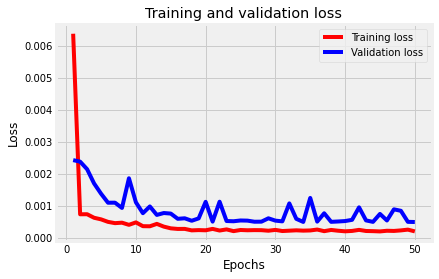

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history): 

    history_dict = history.history
    history_dict.keys()

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, loss, 'r', label='Training loss')
    # b is for "solid blue line"
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
plot_history(history)

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset_numpy[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

# Root Mean Square Error(RMSE). 
# The error or the difference between the target and the obtained output value is minimized by using RMSE value.

2.1043263143178432

In [ ]:
# 실제 값으로 보여주기
test[['Adj Close', 'Predictions']]

,Adj Close,Predictions
Date,,
2020-08-24,120.899185,118.731277
2020-08-25,119.898750,121.185272
2020-08-26,119.446617,120.125587
2020-08-27,119.908363,119.634270
2020-08-28,120.312386,120.083641
...,...,...
2021-05-24,144.720001,144.850739
2021-05-25,143.789993,144.713730
2021-05-26,143.380005,143.699585


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


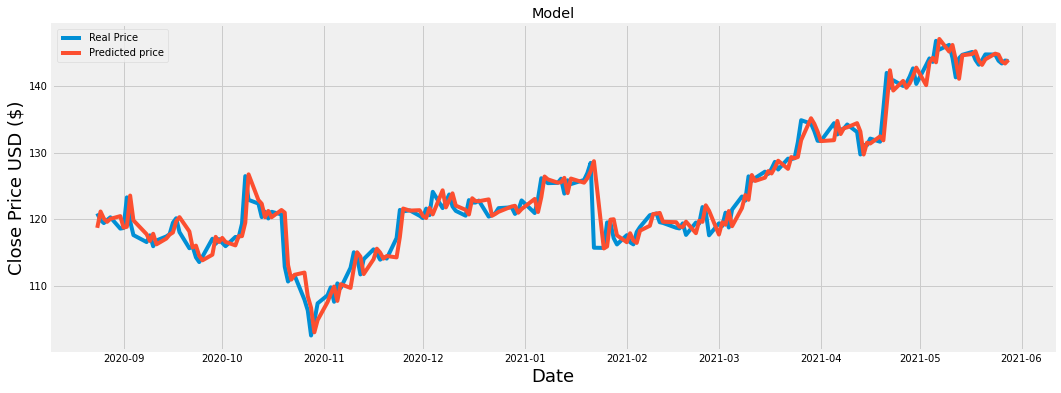

In [ ]:
# Plot the data
train = data[:training_data_len]
test = data[training_data_len:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(test[['Adj Close', 'Predictions']])
plt.legend(['Real Price', 'Predicted price'], loc='best')
plt.show()

# Epoch 100인 경우

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=20, epochs=100, validation_split = 0.1)

Epoch 1/100
164/164 [==============================] - 5s 13ms/step - loss: 0.0238 - val_loss: 0.0025
Epoch 2/100
164/164 [==============================] - 1s 8ms/step - loss: 7.9470e-04 - val_loss: 0.0029
Epoch 3/100
164/164 [==============================] - 1s 8ms/step - loss: 9.6392e-04 - val_loss: 0.0027
Epoch 4/100
164/164 [==============================] - 1s 8ms/step - loss: 7.7233e-04 - val_loss: 0.0016
Epoch 5/100
164/164 [==============================] - 1s 8ms/step - loss: 7.5314e-04 - val_loss: 0.0014
Epoch 6/100
164/164 [==============================] - 1s 8ms/step - loss: 6.1744e-04 - val_loss: 0.0016
Epoch 7/100
164/164 [==============================] - 1s 8ms/step - loss: 4.9312e-04 - val_loss: 0.0013
Epoch 8/100
164/164 [==============================] - 1s 8ms/step - loss: 4.6670e-04 - val_loss: 0.0011
Epoch 9/100
164/164 [==============================] - 1s 8ms/step - loss: 4.1289e-04 - val_loss: 9.1353e-04
Epoch 10/100
164/164 [==============================] 

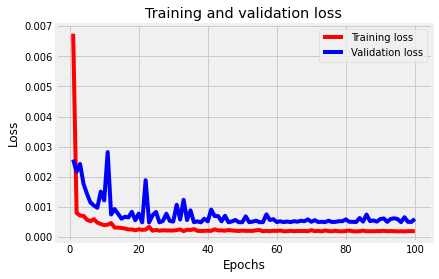

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history): 

    history_dict = history.history
    history_dict.keys()

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, loss, 'r', label='Training loss')
    # b is for "solid blue line"
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
plot_history(history)

# Epoch이 50일 때부터 거의 수렴함. 따라서, 학습을 Epoch 50까지 돌리는게 좋음

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset_numpy[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2.520168200772124

In [ ]:
test[['Adj Close', 'Predictions']]

,Adj Close,Predictions
Date,,
2020-08-24,120.899185,117.429985
2020-08-25,119.898750,119.765038
2020-08-26,119.446617,118.738098
2020-08-27,119.908363,118.283386
2020-08-28,120.312386,118.716049
...,...,...
2021-05-24,144.720001,143.010208
2021-05-25,143.789993,142.973022
2021-05-26,143.380005,142.090179


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


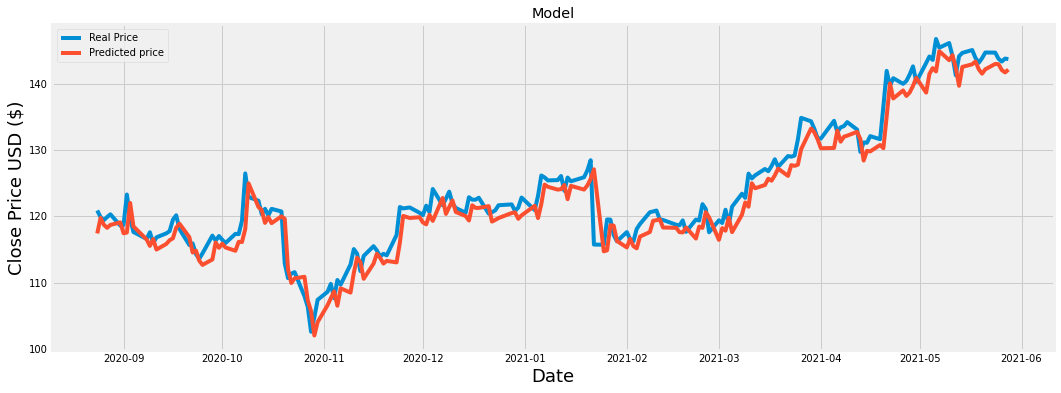

In [ ]:
# Plot the data
train = data[:training_data_len]
test = data[training_data_len:]
test['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(test[['Adj Close', 'Predictions']])
plt.legend(['Real Price', 'Predicted price'], loc='best')
plt.show()

# LSTM 한계
- 학습을 시켜 미래의 주가를 예측하기 위한 프로그램인데, 자세히 보면 파란색 실제 주가데이터가 먼저 움직이고, 미세하게 뒤따라 빨간색 예측 그래프가 움직이는 것을 볼 수 있음 -> 예측이 아니라 주가 따라가기 (lagging)
    * 이미 폭락한 다음에 따라 떨어지고, 이미 폭등한 다음에 따라 올라감

# 금융 데이터 문제점
1. 시계열 Feature 자체의 노이즈

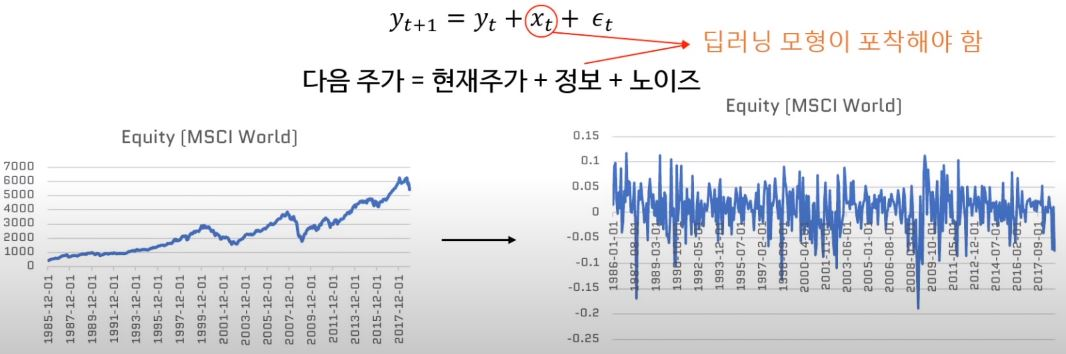

In [ ]:
from IPython.display import Image
Image('/TimeSeriesProb1.JPG')

# 결과: 노이즈 > 정보량여서, 학습이 어려워짐

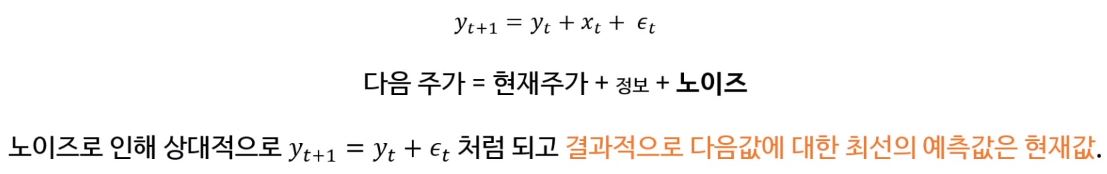

In [ ]:
from IPython.display import Image
Image('/TimeSeriesProb1-1.JPG')

2. 고려해야할 요소가 많음
   * 주가 데이터 + 매크로 데이터(금리, 인플레이션, 장단기금리차 등) + High Level Feature(자산군 모멘텀 효과, 자산군 평균회귀 효과, 확장적/긴축적 통화정책 분류, 단기/장기 부채사이클 등)

# 주가 예측 개선하기 위해 추가할 수 있는 것
1. 거래량은 종목 예측에 쓰이는 데이터 중 하나이기 때문에 특징값으로 사용하기
2. 값이 변화하는 경향을 파악하기 위해, 전날 데이터와 비교한 수정종가 변화량과 거래량 변화량을 특징값으로 사용하기
(논문에 따르면, 경향만 있는 경우가 성능이 좋음)
3. 모델의 성능을 최대로 끌어올리기(배치 정규화, 하이퍼파라미터 최적화, 모델 앙상블 등)
  * 배치 정규화(Batch Normalization): 인공 신경망의 각 층에 들어가는 입력을 평균과 분산으로 정규화하여 학습을 효율적으로 만듦
  * 참고: 케라스 창시자에게 배우는 딥러닝 책 7.3
4. 주가 데이터는 시계열적 특성을 가지기 때문에, 예측 정확도 높아지게 하기 위해서는 Train과 Test 셋 나눌 때 주의해야함
5. 그 외 방법: 
    - Time-Series Denoising(Moving Average, Bilateral Filter, CNN stacked Autoencoder 기반 Denoising Module), 
    - Overfitting 최소화(Asynchronous Multi Network Learning, Bayesian Inference)
  * 참고: 금융과 딥러닝 - 금융 영역에서의 딥러닝은 어떻게 다른가? https://youtu.be/dB8cpsnZ5FA

[*********************100%***********************]  1 of 1 downloaded


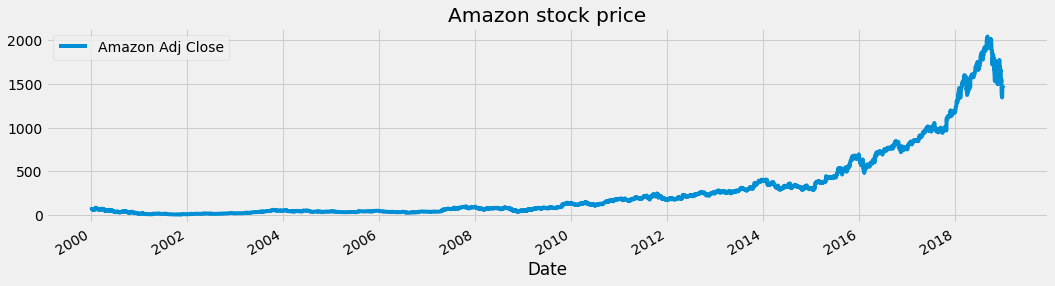

In [ ]:
# Amazon 2000년~ 2018년 주가 데이터 분석

# Pandas의 DataReader함수:구글이 제공하는 주가 정보 받아올 수 있음
from pandas_datareader import data
import fix_yahoo_finance as yf
from datetime import datetime # 최근 날짜 받기 위해

yf.pdr_override()

start_date = '2000-1-1'
end_date = '2018-12-31'
dataset = data.get_data_yahoo('AMZN', start_date, end_date) # IBM 주가, 2006-01-01~ 현재 날짜(2021년 5월 27일)

# Create a new dataframe with only the 'Adj Close' column
data = dataset.filter(['Adj Close'])

# Convert the dataframe to a numpy array
dataset_numpy = data.values

# We have chosen 'Adj Close' attribute for prices. Let's see what it looks like
dataset["Adj Close"].plot(figsize=(16,4),legend=True)
plt.legend(['Amazon Adj Close'])
plt.title('Amazon stock price')
plt.show()

# 결과: 2000년~2015년은 변동 폭 완만하게 증가, 2016년부터는 변동폭 급격하게 증가함
# 따라서, 전체 dataset을 단순히 7:3의 비율로 Train / Test set으로 나누면 
# 두 데이터 셋의 경향이 다르기 때문에 예측 정확도 낮아짐

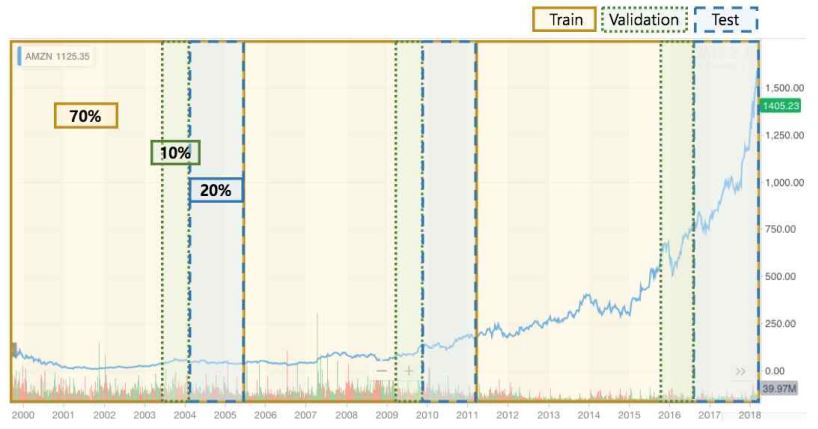

In [ ]:
from IPython.display import Image
Image('/AMZN.JPG')

# 해결 방법: 전체 데이터셋을 시간 순으로 30%, 30%, 40%으로 먼저 분할 후, 
# 다시 Train/Validation/Test를 70%, 10%, 20%로 분할
# 최종 성능은 세 셋의 평균값으로 함

# 참고 문헌 
1. 논문: LSTM을 이용한 주가예측 모델의 학습방법에 따른 성능분석, 2020, 정종진, 김지연
2. Kaggle 코드: https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm
3. 책: 딥 러닝을 이용한 자연어 처리 입문, 유원준 저 https://wikidocs.net/book/2155 
4. 논문: Predicting Stock Prices with LSTM, by Murtaza Roondiwala
5. 책: 케라스 창시자에게 배우는 딥러닝, 프랑스 숄레 저
6. 유튜브 영상: 금융과 딥러닝 - 금융 영역에서의 딥러닝은 어떻게 다른가? https://youtu.be/dB8cpsnZ5FA
7. 논문: 1. LSTM을 이용한 주가예측 모델의 학습방법에 따른 성능분석, 정종진, 2020 https://www.koreascience.or.kr/article/JAKO202034352379471.pdf
8. 논문: 데이터 증강을 통한 딥러닝 기반 주가 패턴 예측
정확도 향상 방안, 2019, 김영준 https://www.koreascience.or.kr/article/JAKO201919163740696.pdf 